# Simple Linear Regression

Linear regression is a technique that allows us to model the relationiship between an dependent variable ${y}$ and a set of independent variables denoted ${X}$. __Simple Linear Regression__ is the case of ${X}$ being just one independent variable. 

In other words a one-to-one relationships with ${y}$ and ${X}$. In statistical relationships we often try to use SLR to construct a line of best fit. 

In [211]:
# Import libraries
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math

In order to obtain the line of best fit we'll establish for each experiment sample (or measurement) i:

- $ {y_i} $ denotes observed response for the measurement i (if it exists).
- $ {x_i} $ denotes the value that produces the observed response and the value that we want to predict for. It also represents the line of best fit.
- $ \dot{y_i} $ is the predicted response based on $ {x_i} $.

We know that the line of best fit can be represented by $ \dot{y_i} = a{x_i} + b $

But what are ${a}$ and ${b}$? We know that the line that fits that data best is one that has each prediction error be as small as possible. We need to find the values of ${a}$ and ${b}$ such that we can minimize the following quantity:

\begin{align}
Q = \sum_{i=1}^{n}{({y_i} - \dot{y_i})}^2
\end{align}

- $ {e_i} = {y_i} - \dot{y_i} $  is the prediction error for a measurement i.
- $ {e_i}^2 $ is the squared prediction error for a measurement i. 
- $ \sum_{i=1}^{n} $ indicates that we will be summing these errors over all measurements

\begin{align}
Q = \sum_{i=1}^{n}{({y_i} - (a{x_i} + b))}^2
\end{align}

If we minimize the equation above we can get:

\begin{align}
{b} = \bar{y} - a{\bar{x}}
\end{align}

\begin{align}
{a} = \frac{\sum_{i=1}^{n}{({x_i} - {x})({y_i} - {y})}}{\sum_{i=1}^{n}{({x_i} - {x}})^2}
\end{align}

Some interesting facts we can note:
- if __the slope__, ${a}$, is positive then the trend must be positive. As ${x}$ increases, ${y}$ increases.
- if __the slope__, ${a}$, is negative then the trend must be negative. As ${x}$ increases, ${y}$ decreases.
- __the intercept__, ${b}$, is going to tell us the predicted value of at ${x} = 0$. This is generally useless unless the scope of the model includes ${x} = 0$. For example, a person who is 0 inches isn't within the scope of the model so the value obtained at the intercept is useless by itself.

So let's establish a function that can take our measurements and provide predictions for each measurement:

In [212]:
def simpleLinearReg(data):
    ht_series = data.ix[:,0]
    ht_series = ht_series.values.reshape(-1, 1)
    wt_series = data.ix[:,1]
    wt_series = wt_series.values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(ht_series, wt_series)
    
    predicted_wt_series = model.predict(ht_series)[:,0]
    data[2] = predicted_wt_series
    data.columns =["${x_i}$", "${y_i}$", "$\dot{y_i}$"]
    
    plt.scatter(ht_series, wt_series)
    plt.plot(ht_series, predicted_wt_series)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()
    return data

Let's take a dataset of the height (X) and weight (y) of 10 students. 

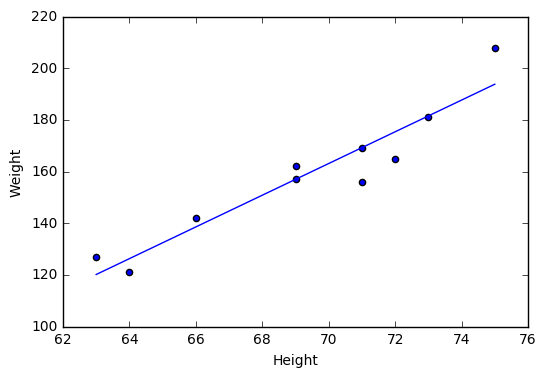

,${x_i}$,${y_i}$,$\dot{y_i}$
0,63,127,120.133237
1,64,121,126.270818
2,66,142,138.545981
3,69,157,156.958726
4,69,162,156.958726
5,71,156,169.233888
6,71,169,169.233888
7,72,165,175.371470
8,73,181,181.509051
9,75,208,193.784214


In [213]:
dataset = pd.DataFrame(np.loadtxt(fname="../data/student_height_weight.txt", skiprows=1, dtype="int16"))
simpleLinearReg(dataset)

The last thing to note when constructing our simple linear regression model is that the errors ${e_i}$ are independent normal random variables with mean of zero and constant variance, ${\sigma}^2$. There's a lot that goes on in that sentence so we can break it down:

__errors ${e_i}$ are independent, random variables__

If we took a random sample from the population can we ensure that each data point is independent of another?

__errors ${e_i}$ are normally distributed__

This makes sense as the errors should mostly be clustered near zero. For example, for a height of 75 we might have weights of 208, 200, 184, 197. Our predicted value is 193 and in order to have a solid simple linear regression model we want our errors to tend to be closer to 0. 

__errors ${e_i}$ have a mean of zero__

As explained above we want them to tend to be zero. 

__errors ${e_i}$ have constant variance__

We want the errors for height=72 and height=75 to have similar spread of errors.
